# Contronto tra Insertion sort e Quick sort
***
## Introduzione

In questo notebook andremo a confrontare due algoritmi di ordinamento: L'**inserion sort** e il **quick sort**. Per farlo andremo a effettuare vari test per capire quale dei due algoritmi sia più efficiente, dal punto di vista di:

- Tempo di esecuzione
- Spazio di memoria utilizzato

per la realizzazione dei test, utilizzeremo i seguenti moduli:

In [188]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import sys


## Insertion sort

L'insertion sort è un algoritmo di ordinamento semplice, basato sui confronti. Fa parte della categoria di algoritmi di ordinamento detti **in place** , ovvero ordina gli
elementi di un array senza doverne creare uno di appoggio, risparmiando memoria. <br>
Pur essendo molto meno efficiente di altri algoritmi più avanzati, ha alcuni vantaggi: 

+ semplice da implementare
+ efficiente per insiemi di partenza che sono quasi ordinati

### Descrizione dell'algoritmo

L'insertion sort ordina al sequenza sul posto. Si assume che la sequenza da ordinare sia partizionata in una sottosequenza già ordinata, inizialmente composta da un elemento, e una ancora da ordinare. Il principio di funzionamento dell'algoritmo prevede che alla $k$-$esima$ iterazione, la sottosequenza di elementi ordinati sia lunga k. Ad ogni iterazione viene preso un elemento dall sottosequenza non ordinata e viene inserito nella posizione corretta nella sottosequenza ordinata.   
La logica descritta sopra è alla base dell'invariante di ciclo di questo algoritmo: 

>   _All'inizio di ciascuna iterazione del ciclo for, la sottosequenza A[1..j-1]
>   consiste degli elementi originali di A[1..j-1] ma ordinati in senso
>   crescente_

attaverso la quale è possibile verificare la correttezza dell'algoritmo

### Analisi delle prestazioni

Il caso ottimo per questo algoritmo è quello in cui la sequenza di partenza è già ordinata. In tal caso, l'algoritmo ha tempo di esecuzione lineare, ossia $\theta(n)$, dove n è la lunghezza della sequenza. Infatti per poter dire che è effettivamente ordinato, l'insertion sort deve comunque analizzare tutti gli elementi. 

Il caso pessimo invece è quello in cui la sequenza risulta orinata al contrario. In questo caso, ogni iterazione dovrà scorrere e spostare ogni elemento della sottosequenza ordinata prima di poter inserire il primo elemento della sottosequenza non ordinata. Pertanto, in questo caso l'algoritmo ha complessità temporale quadratica ossia $\theta(n^2)$.

Anche il caso medio risulta di complessità quadratica, il che lo rende inutilizzabile per sequenze di grandi dimensioni.  




In [189]:
def insertion_sort(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        while j >= 0 and key < A[j]:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key
    return A  

## Quick sort

Questo algoritmo, come l'insertion sort, è un algoritmo di ordinamento basato dui confronti e fa parte della categoria di algoritmi detti **in place**. Tuttavia, a differenza dell'insertion sort, non è un algoritmo **stabile**, ovvero non preserva l'ordine relativo degli elementi con chiave uguale. <br>

### Descrizione dell'algoritmo

E' un algoritmo di tipo **divide et impera**:

+ divide: la sequenza da ordinare viene divisa in due sottosequenze
+ impera: le due sottosequenze vengono ordinate ricorsivamente
+ combina: le due sottosequenze ordinate vengono combinate per ottenere la sequenza ordinata


L'idea alla base di questo algoritmo è la seguente: 

>_data un una sequenza di elementi, si sceglie un elemento detto **pivot**. Si riordinano gli elementi in modo tale che tutti gli elementi minori del pivot siano a sinistra di esso, e tutti gli elementi maggiori a destra. A questo punto, il pivot è nella posizione che avrà nella sequenza ordinata. Si ripete il procedimento per le due sottosequenze di elementi a sinistra e a destra del pivot._ <br>

L'elemento pivot può essere scelto in diversi modi. In questo notebook è stato scelto il primo elemento della sequenza, ma è possibile scegliere anche l'ultimo, un elemento a caso, o il mediano. <br>

### Analisi delle prestazioni
Il tempo di esecuzione del quick sort dipende dal fatto che il partizionamento sia bialnciato o sbilanciato e ciò dipende dalla scelta del pivot.


Il caso ottimo per questo algoritmo è quello in cui la sequenza da ordinare viene divisa in due sottosequenze di lunghezza uguale. In questo caso, l'algoritmo ha complessità lineare, ossia $\theta(n log n)$, dove n è la lunghezza della sequenza. Infatti, in questo caso, il numero di confronti necessari per ordinare la sequenza è pari a $n log n$. <br>

Il caso medio risulta di complessità lineare, il che lo rende un algoritmo molto efficiente anche per sequenze di grandi dimensioni.

Il caso pessimo invece è quello in cui la sequenza viene divisa in due sottosequenze di lunghezza 1 e n-1. In questo caso, l'algoritmo ha complessità quadratica, ossia $\theta(n^2)$, dove n è la lunghezza della sequenza. Infatti, in questo caso, il numero di confronti necessari per ordinare la sequenza è pari a $n^2$.


Randomizzando il quick sort si ottiene un algoritmo che ha complessità attesa lineare anche nel caso pessimo. Questo è dovuto al fatto che, randomizzando la scelta del pivot, la probabilità che la sequenza venga divisa in due sottosequenze di lunghezza 1 e n-1 è molto bassa. <br>


In [190]:
def quick_sort(A):
    if len(A) <= 1:
        return A
    else:
        pivot = A[0]
        left = []
        right = []
        for x in A[1:]:
            if x < pivot:
                left.append(x)
            else:
                right.append(x)
        return quick_sort(left) + [pivot] + quick_sort(right)
    

## Funzioni usate per il confronto


### rand_list
Funzione che genera una lista di numeri interi casuali di lunghezza n

In [191]:
# scrivere una funzione rand_list(n) che ritorna un array di n elementi random interi usando la funzione random.randint(0, 100)
def rand_list(top_of_range, n):
    return [random.randint(0, top_of_range) for _ in range(n)]

### plot_results

Funzione che genera un grafico a linee che mostra i tempi di esecuzione di insertion sort e quick sort su una lista di numeri casuali di lunghezza n. <br>
La funzione usa la libreria matplotlib per generare il grafico.

In [192]:
def plot_results(x, y, labels):
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i])
    plt.xlabel('n')
    plt.ylabel('time (s)')
    plt.legend()
    plt.show()

## Test di velocità 

Questo test confronta i due algoritmi dal punto di vista della velocità. attraverso la funzione **rand_list(top_of_range, n)** generiamo una lista di numeri casuali di lunghezza **n**. <br>
In questo test andremo a ordinare un set di array di lunghezza variabile e generati casualmente, con entrambi gli algoritmi di ordinamento. L'obiettivo del test è vedere come si comportano l'insertion sort e il quick sort al variare della lunghezza dell'array. <br>

La funzione **speed_test_unordered(n)** prende in input la lunghezza dell'array, genera un array a valori casuali di tale lunghezza e esegue entrambi gli algoritmi di ordinamento. La funzione ritorna un array conenente il tempo di esecuzione di entrambi gli algoritmi. <br>

In [193]:
def speed_test_ordered(n):
    A = [i for i in range(n)]
    #speed test per quick sort
    start = timer()
    quick_sort(A.copy())
    end = timer()
    quicksort_time = end - start

    #speed test per insertion sort

    start = timer()
    insertion_sort(A.copy())
    end = timer()
    insertionSort_time = end - start
    
    return quicksort_time, insertionSort_time
 
def speed_test_unordered(n):
    A = rand_list(100, n)

    start = timer()
    quick_sort(A.copy())
    end = timer()
    quicksort_time = end - start

    #speed test per insertion sort

    start = timer()
    insertion_sort(A.copy())
    end = timer()
    insertionSort_time = end - start
    
    return quicksort_time, insertionSort_time

In [194]:
#lenghts = [5, 10, 20, 50, 100, 1000, 2000, 5000, 10000, 20000, 100000, 200000]
lenghts = [5,10,20,50,100,1000,2000,5000,10000]
quicksort_times = []
insertionsort_times = []



Tempi quick sort:  [1.840014010667801e-05, 1.9700033590197563e-05, 3.4700147807598114e-05, 9.289989247918129e-05, 0.00017559994012117386, 0.0026765000075101852, 0.004049499984830618, 0.02404950000345707, 0.06007319991476834]

Tempi insertion sort:  [1.109996810555458e-05, 1.3899989426136017e-05, 2.3399945348501205e-05, 0.0001338999718427658, 0.0008401002269238234, 0.05046930001117289, 0.14784770016558468, 0.9211634998209774, 3.5841488998848945]


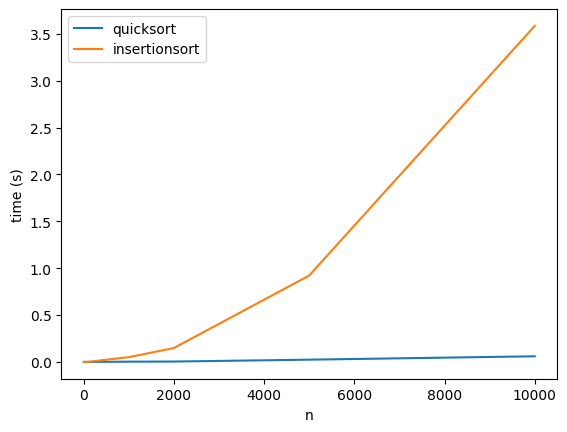

In [195]:

for n in lenghts:
    quicksort_time, insertionsort_time = speed_test_unordered(n)
    quicksort_times.append(quicksort_time)
    insertionsort_times.append(insertionsort_time)

print("\nTempi quick sort: ", quicksort_times)
print("\nTempi insertion sort: ", insertionsort_times)

plot_results(lenghts, [quicksort_times, insertionsort_times], ["quicksort", "insertionsort"])



Di seguito è riportato il plot dei risultati dello speed_test_unordered, eseguito con array più grandi di quelli riportati sopra:

>![plot con n max uguale a 200000](output.png "plot con n max uguale a 200000") 
>
>Sulle ascisse è indicato il numero di elementi e sulle ordinate il tempo di esecuzione in secondi.

Come previsto dalle analisi riportate sopra, l'insertion sort ha un andamento quadratico, mentre il quick sort mantiene un andamento lineare al crescere di n. Questo rende il quick sort decisamente migliore dell'insertion sort per n molto grandi, ma ciò non toglie che, per n piccole, l'insertion sort sia migliore. Infatti questo algoritmo risulta migliore se dobbiamo lavorare con array di piccole dimensioni e parzialmente ordinati 

Vediamo cosa succede se, invece di un array ordinato, diamo in input un array ordinato:


Tempi quick sort:  [1.4599878340959549e-05, 1.950003206729889e-05, 8.329981938004494e-05, 0.00020540016703307629, 0.0012024000752717257, 0.004901700187474489, 0.01860449998639524, 0.055264299968257546]

Tempi insertion sort:  [4.600035026669502e-06, 3.6999117583036423e-06, 7.400056347250938e-06, 1.3699987903237343e-05, 5.13000413775444e-05, 9.099999442696571e-05, 0.00012199999764561653, 0.0001517999917268753]


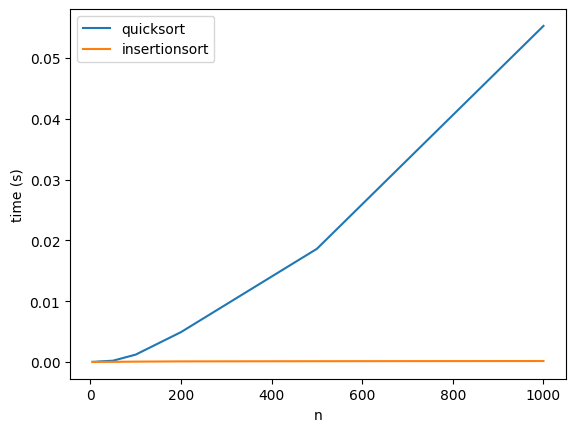

In [196]:
lenghts = [5,10,20,50,100,200,500,1000]
quicksort_times = []
insertionsort_times = []

for n in lenghts:
    quicksort_time, insertionsort_time = speed_test_ordered(n)
    quicksort_times.append(quicksort_time)
    insertionsort_times.append(insertionsort_time)

print("\nTempi quick sort: ", quicksort_times)
print("\nTempi insertion sort: ", insertionsort_times)

plot_results(lenghts, [quicksort_times, insertionsort_times], ["quicksort", "insertionsort"])

Come possiamo vedere dal grafico, con un array già ordinato, l'insertion sort si comporta molto meglio di quick sort, mantenendo un tempo di esecuzione lineare. 
Il quick sort mantiene un tempo di esecuzione $n^2$ nel caso peggiore, ovvero quando le partizioni hanno dimensione 1 e n-1. Se viene scelto come pivot il primo elemento, il caso peggiore si verifica proprio quando l'array è già ordinato.

## Test di memoria

Un altro parametro interessante da valutare è lo spazio usato in memoria dagli algoritmi per ordinare un array. <br>
In questo test andremo a ordinare un set di array di lunghezza variabile e generati casualmente, con entrambi gli algoritmi di ordinamento. L'obiettivo del test è vedere, a parità di valori di input, come si comportano l'insertion sort e il quick sort dal punto di vista della memoria. <br>

In [197]:
def mem_test(n):
    A = rand_list(100, n)
    return sys.getsizeof(quick_sort(A.copy())), sys.getsizeof(insertion_sort(A.copy()))

test = mem_test(1000)
print("\nMemoria occupata da quick sort: ", test[0])
print("\nMemoria occupata da insertion sort: ", test[1])


Memoria occupata da quick sort:  8056

Memoria occupata da insertion sort:  8056


Grazie a questo test vediamo che, dal punto di vista della memoria, i due algoritmi sono analoghi.